# Q-1

Total Marks: 100
Each question 10 marks
Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def freq_calc(input):
    word_freq={}
    for word in input.split(' '):
        if word in word_freq:
            word_freq[word] = word_freq[word] +1
            
        else:
            word_freq[word]=1
            
    max_word = max(word_freq, key=lambda x: word_freq[x])
    statement = f"'{max_word}' is the highest frequent word with frequency {max(word_freq.values())} and legth {len(max_word)}"
    print(statement)
    
    return len(max_word)
            
    

In [2]:
string = "write write write all the number from from from 1 to 100"
freq_calc(string)

'write' is the highest frequent word with frequency 3 and legth 5


5

In [3]:
string = "My name is manish and my hobby is coding i am coding when i got the time. i enjoy it alot. kepp  coding .."
freq_calc(string)

'coding' is the highest frequent word with frequency 3 and legth 6


6

# Q-2

In [10]:
def validation(string):
    word_freq={}
    for word in string:
        if word in word_freq:
            word_freq[word] = word_freq[word] +1
            
        else:
            word_freq[word]=1
    if len(set(word_freq.values())) > 1:
        return 'NO'
    else:
        return 'YES'
            
    

In [12]:
string = "manish"
val=validation(string)
val

'YES'

In [14]:
string = "maanish"
val=validation(string)
val

'NO'

In [7]:
len(set(val.values()))


2

# Q-3

In [24]:
import urllib.request

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

urllib.request.urlretrieve(url,'data.txt')

filename = 'data.txt'

with open(filename, 'r') as file:
    contents = file.read()




In [20]:
import requests

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

filename = 'data.txt'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)


In [26]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=36635681d644a54a4c5394c932f96fe6390e8d62a0353beeeb7d037fe732a4d3
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/78/0e/8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built wget


In [52]:
import wget
import json

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

filename = 'data.json'

wget.download(url, filename)

with open(filename,'r') as file:
    content = json.load(file)
    


In [70]:
import pandas as pd
data=pd.read_json("data.json")
data

,pokemon
0,"{'id': 1, 'num': '001', 'name': 'Bulbasaur', '..."
1,"{'id': 2, 'num': '002', 'name': 'Ivysaur', 'im..."
2,"{'id': 3, 'num': '003', 'name': 'Venusaur', 'i..."
3,"{'id': 4, 'num': '004', 'name': 'Charmander', ..."
4,"{'id': 5, 'num': '005', 'name': 'Charmeleon', ..."
...,...
146,"{'id': 147, 'num': '147', 'name': 'Dratini', '..."
147,"{'id': 148, 'num': '148', 'name': 'Dragonair',..."
148,"{'id': 149, 'num': '149', 'name': 'Dragonite',..."
149,"{'id': 150, 'num': '150', 'name': 'Mewtwo', 'i..."


In [1]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Fetch data from the URL
response = requests.get(url)
data = response.json()

# Extract the column data
columns = list(data["pokemon"][1].keys())
columns

# Create an empty DataFrame with the extracted column names
df = pd.DataFrame(columns=columns)


for pokemon in data["pokemon"]:
    row = [pokemon.get(column) for column in columns]
    df.loc[len(df)] = row


In [3]:
df.to_csv("pokemon_data.csv")

In [90]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Fetch data from the URL
response = requests.get(url)
data = response.json()

# Collect all unique keys as column names
columns = []
for pokemon in data["pokemon"]:
    for key in pokemon.keys():
        if key not in columns:
            columns.append(key)

# Create an empty DataFrame with the extracted column names
df = pd.DataFrame(columns=columns)

# Iterate over the Pokemon data and add rows to the DataFrame
for pokemon in data["pokemon"]:
    row = [pokemon.get(column) for column in columns]
    df.loc[len(df)] = row

df.to_excel('output.xlsx', index=False)


# Q-4

In [98]:
import requests
import pandas as pd

url = "https://data.nasa.gov/resource/y77d-th95.json"

# Fetch data from the URL
response = requests.get(url)
earth_data = response.json()


In [106]:
# Save JSON data to a file
with open("earth_data.json", "w") as file:
    json.dump(earth_data, file)

In [115]:
import requests
import pandas as pd

url = "https://data.nasa.gov/resource/y77d-th95.json"

# Fetch data from the URL
response = requests.get(url)
earth_data = response.json()

columns = [] #Initiating Empty list for storing column names
for data in earth_data:
    for key in data.keys():
        if key not in columns:
            columns.append(key)

#Creating data frame columns 
df=pd.DataFrame(columns=columns)

# Iterate over the  earth_data and add rows to the DataFrame
for data in earth_data:
    row = [data.get(column) for column in columns]
    df.loc[len(df)] = row 
    
df=df.iloc[:,:-2] # deleting last two unrelated column
df.to_csv('earth_data.csv')


# Q-5

In [81]:
# !pip install wget


In [82]:
import wget
import json
from bs4 import BeautifulSoup


url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"


filename = 'movie_data.json'

wget.download(url, filename)

with open(filename,'r') as file:
    data_dict = json.load(file)
    
    
episodes = data_dict.get('_embedded', {}).get('episodes', [])

# Extract the desired columns for each episode
columns = ['id', 'name', 'season', 'number', 'type', 'airdate', 'airstamp', 'runtime', 'rating', 'summary', 'image']
episode_data = []
for episode in episodes:
    extracted_data = {col: episode.get(col) for col in columns}
    episode_data.append(extracted_data)

# Create a DataFrame from the extracted episode data
df = pd.DataFrame(episode_data)


# To removbe HTML tags from 'summary' column 
df['summary'] = df['summary'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# Extracting 'medium' and 'original' column from 'image' column 
df['medium'] = df['image'].apply(lambda x: x['medium'])
df['original'] = df['image'].apply(lambda x: x['original'])


# Q-6

In [62]:
import pandas as pd

df=pd.read_csv("pokemon_data.csv")



In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      151 non-null    int64  
 1   id              151 non-null    int64  
 2   num             151 non-null    int64  
 3   name            151 non-null    object 
 4   img             151 non-null    object 
 5   type            151 non-null    object 
 6   height          151 non-null    object 
 7   weight          151 non-null    object 
 8   candy           151 non-null    object 
 9   candy_count     70 non-null     float64
 10  egg             151 non-null    object 
 11  spawn_chance    151 non-null    float64
 12  avg_spawns      151 non-null    float64
 13  spawn_time      145 non-null    object 
 14  multipliers     70 non-null     object 
 15  weaknesses      151 non-null    object 
 16  prev_evolution  72 non-null     object 
 17  next_evolution  70 non-null     obj

In [ ]:
# ● Get all Pokemons whose spawn rate is less than 5%


df[df['avg_spawns']<5]


In [ ]:
# ● Get all Pokemons that have less than 4 weaknesses

df['weaknesses']=df['weaknesses'].apply(eval)
df[df['weaknesses'].apply(lambda x: len(x) < 4)]

In [ ]:
# ● Get all Pokemons that have no multipliers at all

df[df['multipliers'].isna()]

In [ ]:
# ● Get all Pokemons that do not have more than 2 evolutions
df['next_evolution'] = df['next_evolution'].apply(eval)
df[df['next_evolution'].apply(lambda x: len(x) <= 2)]

In [66]:
df['next_evolution']

0      [{'num': '002', 'name': 'Ivysaur'}, {'num': '0...
1                   [{'num': '003', 'name': 'Venusaur'}]
2                                                    NaN
3      [{'num': '005', 'name': 'Charmeleon'}, {'num':...
4                  [{'num': '006', 'name': 'Charizard'}]
                             ...                        
146    [{'num': '148', 'name': 'Dragonair'}, {'num': ...
147                [{'num': '149', 'name': 'Dragonite'}]
148                                                  NaN
149                                                  NaN
150                                                  NaN
Name: next_evolution, Length: 151, dtype: object

In [ ]:
import ast
import numpy as np

df['next_evolution'] = df['next_evolution'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)


In [ ]:
df[df['next_evolution'].apply(lambda x : len(eval(x))<=2 if not pd.isna(x) and isinstance(eval(x), (list, tuple)) else False)]


In [70]:
df['next_evolution'][0]

[{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]

In [ ]:
# ● Get all Pokemons whose spawn time is less than 300 seconds.


import numpy as np

def convert_to_seconds(time_str):
    if pd.isna(time_str):
        return np.nan
    else:
        parts = time_str.split(":")
        minutes = int(parts[0])
        sec = int(parts[1])
        seconds = minutes * 60
        return seconds

df['spawn_time_seconds'] = df['spawn_time'].apply(convert_to_seconds)
df[df['spawn_time_seconds'] < 300]





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Pokemon dataset
df = pd.read_csv('pokemon_data.csv')

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 0.05
filtered_spawn_rate = df[df['spawn_chance'] < spawn_rate_threshold]

# Plot the spawn rate distribution
plt.hist(df['spawn_chance'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(spawn_rate_threshold, color='red', linestyle='dashed', linewidth=1.5, label='Threshold')
plt.xlabel('Spawn Rate')
plt.ylabel('Count')
plt.title('Spawn Rate Distribution')
plt.legend()
plt.show()

# Get all Pokemons that have less than 4 weaknesses
num_weakness_threshold = 4
filtered_weakness = df[df['num_weaknesses'] < num_weakness_threshold]

# Plot the distribution of number of weaknesses
plt.hist(df['num_weaknesses'], bins=range(0, 11), color='skyblue', edgecolor='black')
plt.axvline(num_weakness_threshold, color='red', linestyle='dashed', linewidth=1.5, label='Threshold')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Count')
plt.title('Number of Weaknesses Distribution')
plt.legend()
plt.show()

# Get all Pokemons that have no multipliers at all
no_multipliers = df[df['num_multipliers'] == 0]

# Get all Pokemons that do not have more than 2 evolutions
max_evolutions = 2
filtered_evolutions = df[df['num_evolutions'] <= max_evolutions]

# Get all Pokemons whose spawn time is less than 300 seconds
def convert_to_seconds(time_str):
    parts = time_str.split(":")
    minutes = int(parts[0])
    seconds = int(parts[1])
    return minutes * 60 + seconds

df['spawn_time_seconds'] = df['spawn_time'].apply(convert_to_seconds)
filtered_spawn_time = df[df['spawn_time_seconds'] < 300]

# Get all Pokemon who have more than two types of capabilities
num_capabilities_threshold = 2
filtered_capabilities = df[df['num_capabilities'] > num_capabilities_threshold]

# Print the analysis results
print("Pokemons with spawn rate less than 5%:")
print(filtered_spawn_rate[['name', 'spawn_chance']])
print("\nPokemons with less than 4 weaknesses:")
print(filtered_weakness[['name', 'num_weaknesses']])
print("\nPokemons with no multipliers:")
print(no_multipliers[['name', 'num_multipliers']])
print("\nPokemons with not more than 2 evolutions:")
print(filtered_evolutions[['name', 'num_evolutions']])
print("\nPokemons with spawn time less than 300 seconds:")
print(filtered_spawn_time[['name', 'spawn_time']])
print("\nPokemons with more than two types of capabilities:")
print(filtered_capabilities[['name', 'num_capabilities']])


# Q-7

In [68]:
import pandas as pd 
df = pd.read_csv("earth_data.csv")

In [69]:
# Delete rows containing non values
df=df.dropna()

In [ ]:
# Create Date column to fetch date from the year column
df['Date'] = pd.to_datetime(df['year'],errors='coerce').dt.date

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ● Get all the Earth meteorites that fell before the year 2000
df[df['Date'].dt.year < 2000]

In [ ]:
# ● Get all the earth meteorites co-ordinates who fell before the year 1970

df[df['Date'].dt.year < 1970][['reclat', 'reclong']]

In [ ]:
# ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
df[df['mass'] > 10000]

In [37]:
# Get all the Earth meteorites coordinates that fell before the year 1970
year_threshold_2 = pd.to_datetime('1970-01-01')
df[df['Date'] < year_threshold_2][['reclat', 'reclong']]

/tmp/ipykernel_170/1682736763.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df[df['Date'] < year_threshold_2][['reclat', 'reclong']]


,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
994,54.50000,35.20000
995,13.63333,79.41667
997,-7.08333,111.53333
998,-6.66667,106.58333


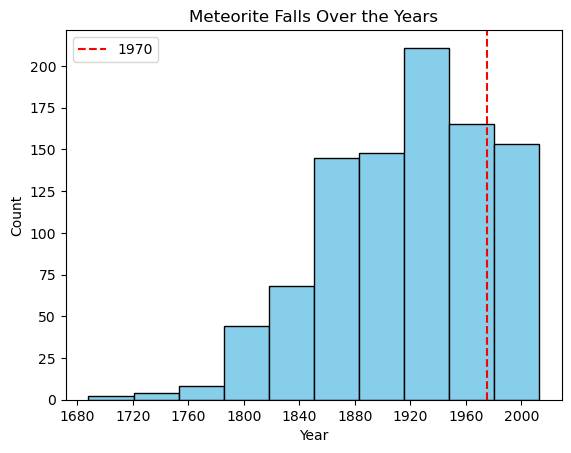

In [76]:
# Plot the distribution of meteorite falls over the years
plt.hist(df['Date'], color='skyblue', edgecolor='black')
plt.axvline(1970, color='red', linestyle='dashed', linewidth=1.5, label='1970')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Meteorite Falls Over the Years')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Earth meteorites dataset
# df = pd.read_csv('earth_data.csv')

# Convert the 'year' column to datetime
df['year'] = pd.to_datetime(df['year'])

# Get all the Earth meteorites that fell before the year 2000
year_threshold = pd.to_datetime('2000-01-01')
filtered_before_2000 = df[df['year'] < year_threshold]

# Plot the distribution of meteorite falls over the years
plt.hist(df['year'].dropna().dt.year, bins=range(1800, 2022, 10), color='skyblue', edgecolor='black')
plt.axvline(year_threshold.year, color='red', linestyle='dashed', linewidth=1.5, label='Threshold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Meteorite Falls Over the Years')
plt.legend()
plt.show()

# Get all the Earth meteorites coordinates that fell before the year 1970
year_threshold_2 = pd.to_datetime('1970-01-01')
filtered_before_1970 = df[df['year'] < year_threshold_2][['reclat', 'reclong']]

# Plot the distribution of meteorite falls on a world map
plt.figure(figsize=(10, 6))
plt.scatter(df['reclong'], df['reclat'], s=10, color='skyblue')
plt.scatter(filtered_before_1970['reclong'], filtered_before_1970['reclat'], s=20, color='red', label='Before 1970')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Falls on World Map')
plt.legend()
plt.grid(True)
plt.show()

# Assuming mass is in kg, get all Earth meteorites with a mass greater than 10000 kg
mass_threshold = 10000
filtered_mass_greater_than_10000 = df[df['mass (g)'] > (mass_threshold * 1000)]

# Plot the distribution of meteorite masses
plt.hist(df['mass (g)'].dropna() / 1000, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mass_threshold, color='red', linestyle='dashed', linewidth=1.5, label='Threshold')
plt.xlabel('Mass (kg)')
plt.ylabel('Count')
plt.title('Distribution of Meteorite Masses')
plt.legend()
plt.show()

# Print the analysis results
print("Earth meteorites that fell before the year 2000:")
print(filtered_before_2000)
print("\nEarth meteorite coordinates that fell before the year 1970:")
print(filtered_before_1970)
print("\nEarth meteorites with a mass greater than 10000 kg:")
print(filtered_mass_greater_than_10000)


# Q-8

In [1]:
import pandas as pd
df=pd.read_csv("web_series.csv")

In [2]:
df=df.drop(df.columns[0],axis=1)

In [3]:
df['rating'][0]

"{'average': 8}"

In [4]:
# Extract the numeric rating value from the "{'average': 8}" format
df['rating'] = df['rating'].str.extract(r"(\d+)").astype(float)

In [5]:
# ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
season_ratings=df.groupby('season')['rating'].mean()
season_ratings

season
1    7.60
2    7.40
3    7.25
4    7.00
Name: rating, dtype: float64

In [ ]:
# Create a plot to compare the ratings for each season
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(season_ratings.index, season_ratings.values, marker='o', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')

# Display the plot
plt.show()

In [ ]:
# ● Get all the episode names, whose average rating is more than 8 for every season

df[df.rating >= 8]

In [ ]:
# ● Get all the episode names that aired before May 2019
from datetime import datetime

df['airdate']=pd.to_datetime(df['airdate'])
df[df['airdate']<pd.Timestamp('2019-05-01')]

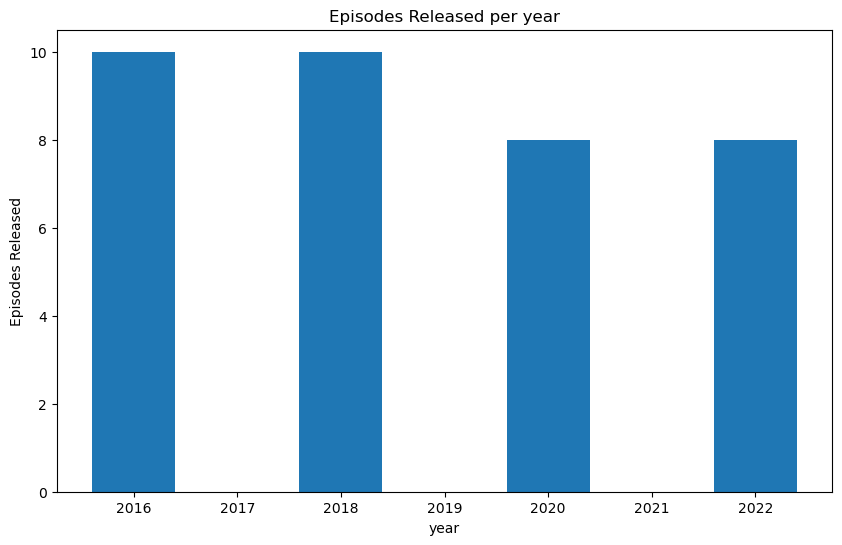

In [37]:
# Create a plot of Episodes Released per year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['airdate'].dt.year,df['number'])

# Add labels and title
plt.xlabel('year')
plt.ylabel('Episodes Released')
plt.title('Episodes Released per year')

# Display the plot
plt.show()

In [ ]:
df

In [23]:
# ● Get the episode name from each season with the highest and lowest rating

highest_rating = df.groupby("season").apply(lambda x: x.iloc[df['rating'].idxmax()]['name'])
lowest_rating = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmin()]['name'])

print(f"Season wise Highest Rating: \n{highest_rating}\n")
print(f"Season wise Lowest Rating: \n{lowest_rating}")

Season wise Highest Rating: 
season
1          The Original
2    Journey Into Night
3          Parce Domine
4          The Auguries
dtype: object

Season wise Lowest Rating: 
season
1              Chestnut
2    Journey Into Night
3       The Winter Line
4          The Auguries
dtype: object


In [16]:
df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmin()]['name'])


season
1              Chestnut
2    Journey Into Night
3       The Winter Line
4          The Auguries
dtype: object

In [25]:
# ● Get the summary for the most popular ( ratings ) episode in every season
df.groupby(df['season']).apply(lambda x: x.loc[x['rating'].idxmax()]['summary'])


season
1    A woman named Dolores is a free spirit in the ...
2    William pays his recuperating father-in-law se...
3    If you're stuck in a loop, try walking in a st...
4    Hello again. Don't worry about a thing. It's a...
dtype: object

# Q-9

In [38]:

import requests

url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"

filename = 'electric_vehical_population_data.txt'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)


In [41]:
import pandas as pd
df=pd.read_csv('electric_vehical_population_data.txt')


In [58]:
# ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle


df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible'][['Make','Model']]


,Make,Model
0,TESLA,MODEL X
1,HONDA,CLARITY
2,TESLA,MODEL 3
3,NISSAN,LEAF
4,TESLA,MODEL S
...,...,...
130428,NISSAN,LEAF
130429,BMW,X5
130432,TESLA,MODEL Y
130436,TESLA,MODEL 3


In [66]:
# ● Get all TESLA cars with the model year, and model type made in Bothell City.

df[df['Make'] == 'TESLA'][['Model','Model Year']]

,Model,Model Year
0,MODEL X,2018
2,MODEL 3,2019
4,MODEL S,2017
9,MODEL S,2013
11,MODEL Y,2022
...,...,...
130436,MODEL 3,2018
130438,MODEL Y,2023
130440,MODEL Y,2021
130441,MODEL X,2020


In [ ]:
# ● Get all the cars that have an electric range of more than 100, and were made after 2015

df[(df['Electric Range']>100) & (df['Model Year'] >2015) ]

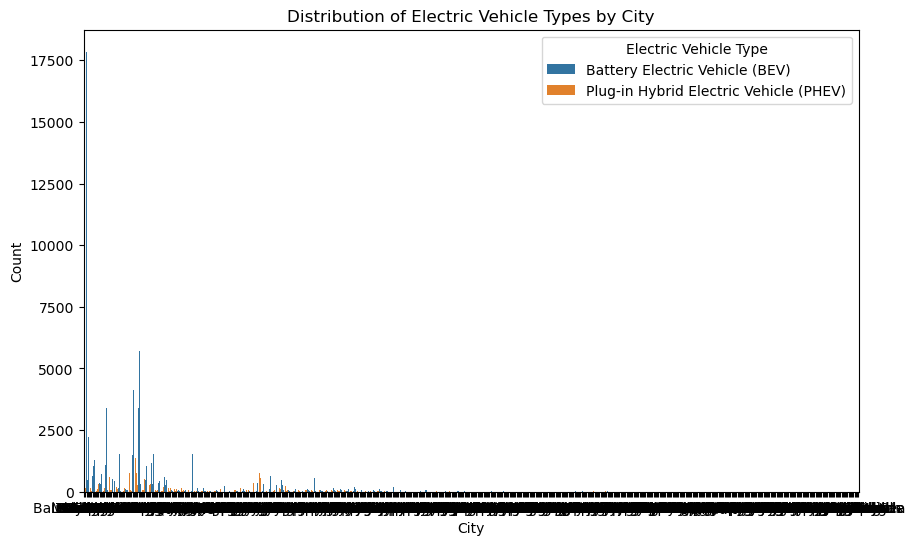

In [75]:
# ● Draw plots to show the distribution between city and electric vehicle type

import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City', hue='Electric Vehicle Type')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.show()




In [80]:
import pandas as pd


# Group the DataFrame by 'City' and 'Vehicle Type' and count the occurrences
grouped_df = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Find the maximum sold vehicle type city-wise
max_sold_df = grouped_df.groupby('City')['Count'].idxmax()
max_sold_vehicle_types = grouped_df.loc[max_sold_df, ['City', 'Electric Vehicle Type', 'Count']]

# Print the maximum sold vehicle type city-wise
print(max_sold_vehicle_types)


                City                   Electric Vehicle Type  Count
0           Aberdeen          Battery Electric Vehicle (BEV)     73
3               Acme  Plug-in Hybrid Electric Vehicle (PHEV)      4
4               Addy          Battery Electric Vehicle (BEV)      1
6               Aiea  Plug-in Hybrid Electric Vehicle (PHEV)      1
7     Airway Heights          Battery Electric Vehicle (BEV)     10
...              ...                                     ...    ...
1044          Yacolt          Battery Electric Vehicle (BEV)     19
1046          Yakima          Battery Electric Vehicle (BEV)    309
1048    Yarrow Point          Battery Electric Vehicle (BEV)    102
1050            Yelm          Battery Electric Vehicle (BEV)    137
1052          Zillah          Battery Electric Vehicle (BEV)     18

[656 rows x 3 columns]


In [94]:
max_sold_vehicle_types.loc[max_sold_vehicle_types['Count'].idxmax()]

City                                            Seattle
Electric Vehicle Type    Battery Electric Vehicle (BEV)
Count                                             17851
Name: 823, dtype: object

In [87]:
df.groupby(['Electric Vehicle Type','City']).count()

VIN (1-10)  County  \
Electric Vehicle Type                  City                                 
Battery Electric Vehicle (BEV)         Aberdeen                73      73   
                                       Acme                     3       3   
                                       Addy                     1       1   
                                       Airway Heights          10      10   
                                       Alderdale                1       1   
...                                                           ...     ...   
Plug-in Hybrid Electric Vehicle (PHEV) Yacolt                  13      13   
                                       Yakima                 162     162   
                                       Yarrow Point            24      24   
                                       Yelm                    60      60   
                                       Zillah                   5       5   

                                                       State  Postal Code  \
Electric Vehicle Type                  City                                 
Battery Electric Vehicle (BEV)         Aberdeen           73           73   
                                       Acme                3            3   
                                       Addy                1            1   
                                       Airway Heights     10           10   
                                       Alderdale           1            1   
...                                                      ...          ...   
Plug-in Hybrid Electric Vehicle (PHEV) Yacolt             13           13   
                                       Yakima            162          162   
                                       Yarrow Point       24           24   
                                       Yelm               60           60   
                                       Zillah              5            5   

                                                       Model Year  Make  \
Electric Vehicle Type                  City                               
Battery Electric Vehicle (BEV)         Aberdeen                73    73   
                                       Acme                     3     3   
                                       Addy                     1     1   
                                       Airway Heights          10    10   
                                       Alderdale                1     1   
...                                                           ...   ...   
Plug-in Hybrid Electric Vehicle (PHEV) Yacolt                  13    13   
                                       Yakima                 162   162   
                                       Yarrow Point            24    24   
                                       Yelm                    60    60   
                                       Zillah                   5     5   

                                                       Model  \
Electric Vehicle Type                  City                    
Battery Electric Vehicle (BEV)         Aberdeen           72   
                                       Acme                3   
                                       Addy                1   
                                       Airway Heights     10   
                                       Alderdale           1   
...                                                      ...   
Plug-in Hybrid Electric Vehicle (PHEV) Yacolt             13   
                                       Yakima            162   
                                       Yarrow Point       24   
                                       Yelm               60   
                                       Zillah              5   

                                                       Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
Electric Vehicle Type                  City                                                                
Battery Electric Vehicle (

# Q-10


In [103]:
# !pip install spacy
# !python -m spacy download en_core_web_sm


In [104]:
import spacy

def count_pos_tags(text):
    # Load the English language model in spaCy
    spacy.prefer_gpu()
    nlp = spacy.load("en_core_web_sm")
    
    # Process the text
    doc = nlp(text)
    
    # Initialize counters for verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Iterate over each token in the document
    for token in doc:
        # Check the part-of-speech tag of the token
        if token.pos_ == 'VERB':
            verb_count += 1
        elif token.pos_ == 'NOUN':
            noun_count += 1
        elif token.pos_ == 'PRON':
            pronoun_count += 1
        elif token.pos_ == 'ADJ':
            adjective_count += 1
    
    # Create a dictionary with the count of each part of speech
    pos_counts = {
        'Verbs': verb_count,
        'Nouns': noun_count,
        'Pronouns': pronoun_count,
        'Adjectives': adjective_count
    }
    
    return pos_counts

# Test cases
text1 = "The cat chased the mouse"
pos_counts1 = count_pos_tags(text1)
print(pos_counts1)  

text2 = "She is eating a delicious pizza"
pos_counts2 = count_pos_tags(text2)
print(pos_counts2)  


{'Verbs': 1, 'Nouns': 2, 'Pronouns': 0, 'Adjectives': 0}
{'Verbs': 1, 'Nouns': 1, 'Pronouns': 1, 'Adjectives': 1}
